## sonali vishal pawar batch =360
## Innomatics reserch labs:online batch
## Dataset link:https://www.kaggle.com/datasets/stratographics/predictive-maintenance-equipment-dataset-for-ml
## Project Title:Predictive Maintenance Automation using Machine Learning
## Project Domain: Industrial Predictive Analytics

# Machine Learning Project: Predictive Maintenance (Equipment Dataset)
## 1. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

import os
print(os.getcwd())


C:\Users\hp\Desktop


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("stratographics/predictive-maintenance-equipment-dataset-for-ml")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\hp\.cache\kagglehub\datasets\stratographics\predictive-maintenance-equipment-dataset-for-ml\versions\2


## Load Dataset

In [5]:
df = pd.read_excel(r'C:/Users/hp/Downloads/PM DATA Training.xlsx')
df

,UID,ProductType,Humidity,Temperature,Age,Quantity,MTTF
0,1,Extruder,5.88,66.17,13,39764,69
1,2,Pressure Cutter,42.76,40.29,4,45181,532
2,3,Extruder,76.62,52.08,4,70397,93
3,4,Pump,45.91,90.26,14,49470,183
4,5,Gauge Machine,78.87,58.56,12,45145,447
...,...,...,...,...,...,...,...
4995,4996,Pump,44.64,42.75,12,55700,340
4996,4997,Extruder,24.88,94.14,9,54351,284
4997,4998,Pump,78.37,62.41,3,27798,216
4998,4999,Pressure Cutter,17.38,87.38,15,71903,91


## Problem Statement

- In manufacturing/automation systems, machines often fail unexpectedly, leading to downtime and financial loss. Predictive maintenance uses ML to predict equipment failure before it happens, so maintenance can be scheduled in advance.

## Objectives
- Automate fault detection in machines using sensor data.
- Build a machine learning model to predict whether a machine will fail soon.
- Reduce downtime and maintenance costs with intelligent automation.

## Data Preprocessing

- Handle missing values
- Encode categorical variables
- Feature scaling

In [6]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UID          5000 non-null   int64  
 1   ProductType  5000 non-null   object 
 2   Humidity     5000 non-null   float64
 3   Temperature  5000 non-null   float64
 4   Age          5000 non-null   int64  
 5   Quantity     5000 non-null   int64  
 6   MTTF         5000 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 273.6+ KB
None
               UID     Humidity  Temperature          Age      Quantity  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    52.344846    64.537680     8.994600  51222.923000   
std    1443.520003    27.617841    17.523957     4.595911  16526.348628   
min       1.000000     5.000000    35.010000     1.000000  23007.000000   
25%    1250.750000    28.372500    49.537500     5.000000  36737.000000 

In [7]:
df.shape

(5000, 7)

In [8]:
target_col = "Failure"   

print("Columns:", df.columns.tolist())

Columns: ['UID', 'ProductType', 'Humidity', 'Temperature', 'Age', 'Quantity', 'MTTF ']


In [9]:
# Strip column names 
df.columns = df.columns.str.strip()

df["Failure"] = (df["MTTF"] < 50).astype(int)

print(df[["MTTF", "Failure"]].head(10))


   MTTF  Failure
0    69        0
1   532        0
2    93        0
3   183        0
4   447        0
5   479        0
6   541        0
7   352        0
8   306        0
9   173        0


In [10]:
# Check missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 UID            0
ProductType    0
Humidity       0
Temperature    0
Age            0
Quantity       0
MTTF           0
Failure        0
dtype: int64


In [11]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               UID     Humidity  Temperature          Age      Quantity  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    52.344846    64.537680     8.994600  51222.923000   
std    1443.520003    27.617841    17.523957     4.595911  16526.348628   
min       1.000000     5.000000    35.010000     1.000000  23007.000000   
25%    1250.750000    28.372500    49.537500     5.000000  36737.000000   
50%    2500.500000    52.310000    64.395000     9.000000  51061.000000   
75%    3750.250000    76.580000    79.810000    13.000000  65559.500000   
max    5000.000000    99.980000    95.000000    17.000000  79995.000000   

             MTTF  Failure  
count  5000.00000   5000.0  
mean    316.26000      0.0  
std     155.19153      0.0  
min      50.00000      0.0  
25%     180.00000      0.0  
50%     315.00000      0.0  
75%     453.00000      0.0  
max     585.00000      0.0  


In [12]:
 df.drop_duplicates()

,UID,ProductType,Humidity,Temperature,Age,Quantity,MTTF,Failure
0,1,Extruder,5.88,66.17,13,39764,69,0
1,2,Pressure Cutter,42.76,40.29,4,45181,532,0
2,3,Extruder,76.62,52.08,4,70397,93,0
3,4,Pump,45.91,90.26,14,49470,183,0
4,5,Gauge Machine,78.87,58.56,12,45145,447,0
...,...,...,...,...,...,...,...,...
4995,4996,Pump,44.64,42.75,12,55700,340,0
4996,4997,Extruder,24.88,94.14,9,54351,284,0
4997,4998,Pump,78.37,62.41,3,27798,216,0
4998,4999,Pressure Cutter,17.38,87.38,15,71903,91,0


In [13]:
 pd.get_dummies(df, drop_first=True)

,UID,Humidity,Temperature,Age,Quantity,MTTF,Failure,ProductType_Extruder,ProductType_Gauge Machine,ProductType_Pressure Cutter,ProductType_Pump
0,1,5.88,66.17,13,39764,69,0,True,False,False,False
1,2,42.76,40.29,4,45181,532,0,False,False,True,False
2,3,76.62,52.08,4,70397,93,0,True,False,False,False
3,4,45.91,90.26,14,49470,183,0,False,False,False,True
4,5,78.87,58.56,12,45145,447,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,44.64,42.75,12,55700,340,0,False,False,False,True
4996,4997,24.88,94.14,9,54351,284,0,True,False,False,False
4997,4998,78.37,62.41,3,27798,216,0,False,False,False,True
4998,4999,17.38,87.38,15,71903,91,0,False,False,True,False


## Outlier Removal

In [14]:
# Identify numeric columns only
num_cols = df.select_dtypes(include=np.number).columns

# Compute IQR only for numeric data
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

#  non-outliers (numeric check only)
df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Original shape:", df.shape)
print("After removing outliers:", df.shape)


Original shape: (5000, 8)
After removing outliers: (5000, 8)


# Exploratory Data Analysis (EDA)

In [15]:
# Clean column names (remove trailing spaces)
df.columns = [col.strip() for col in df.columns]

In [16]:
print(df.describe())

               UID     Humidity  Temperature          Age      Quantity  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    52.344846    64.537680     8.994600  51222.923000   
std    1443.520003    27.617841    17.523957     4.595911  16526.348628   
min       1.000000     5.000000    35.010000     1.000000  23007.000000   
25%    1250.750000    28.372500    49.537500     5.000000  36737.000000   
50%    2500.500000    52.310000    64.395000     9.000000  51061.000000   
75%    3750.250000    76.580000    79.810000    13.000000  65559.500000   
max    5000.000000    99.980000    95.000000    17.000000  79995.000000   

             MTTF  Failure  
count  5000.00000   5000.0  
mean    316.26000      0.0  
std     155.19153      0.0  
min      50.00000      0.0  
25%     180.00000      0.0  
50%     315.00000      0.0  
75%     453.00000      0.0  
max     585.00000      0.0  


In [17]:
# Skewness & Kurtosis
print("Skewness:\n", df.skew(numeric_only=True))
print("Kurtosis:\n", df.kurt(numeric_only=True))


Skewness:
 UID            0.000000
Humidity      -0.001021
Temperature    0.025703
Age            0.005413
Quantity       0.036745
MTTF           0.013301
Failure        0.000000
dtype: float64
Kurtosis:
 UID           -1.200000
Humidity      -1.222073
Temperature   -1.221224
Age           -1.150697
Quantity      -1.207828
MTTF          -1.216146
Failure        0.000000
dtype: float64


# Correlation heatmap

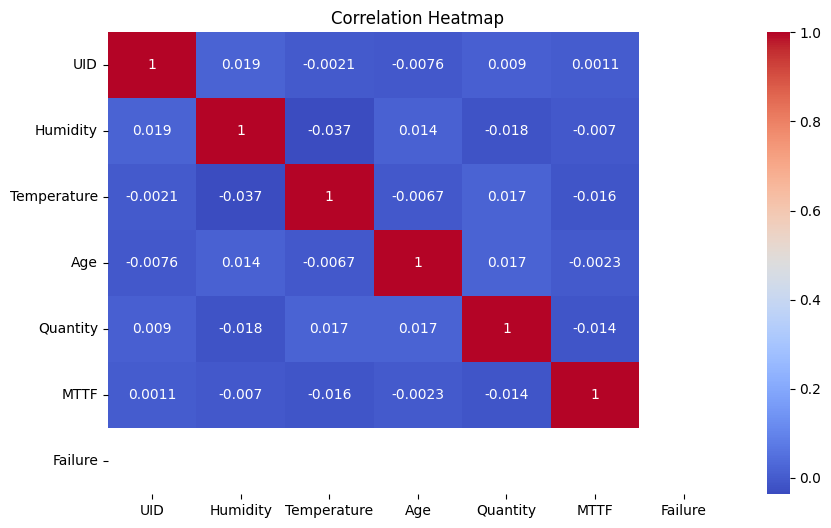

In [18]:

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# Histograms for numerical features

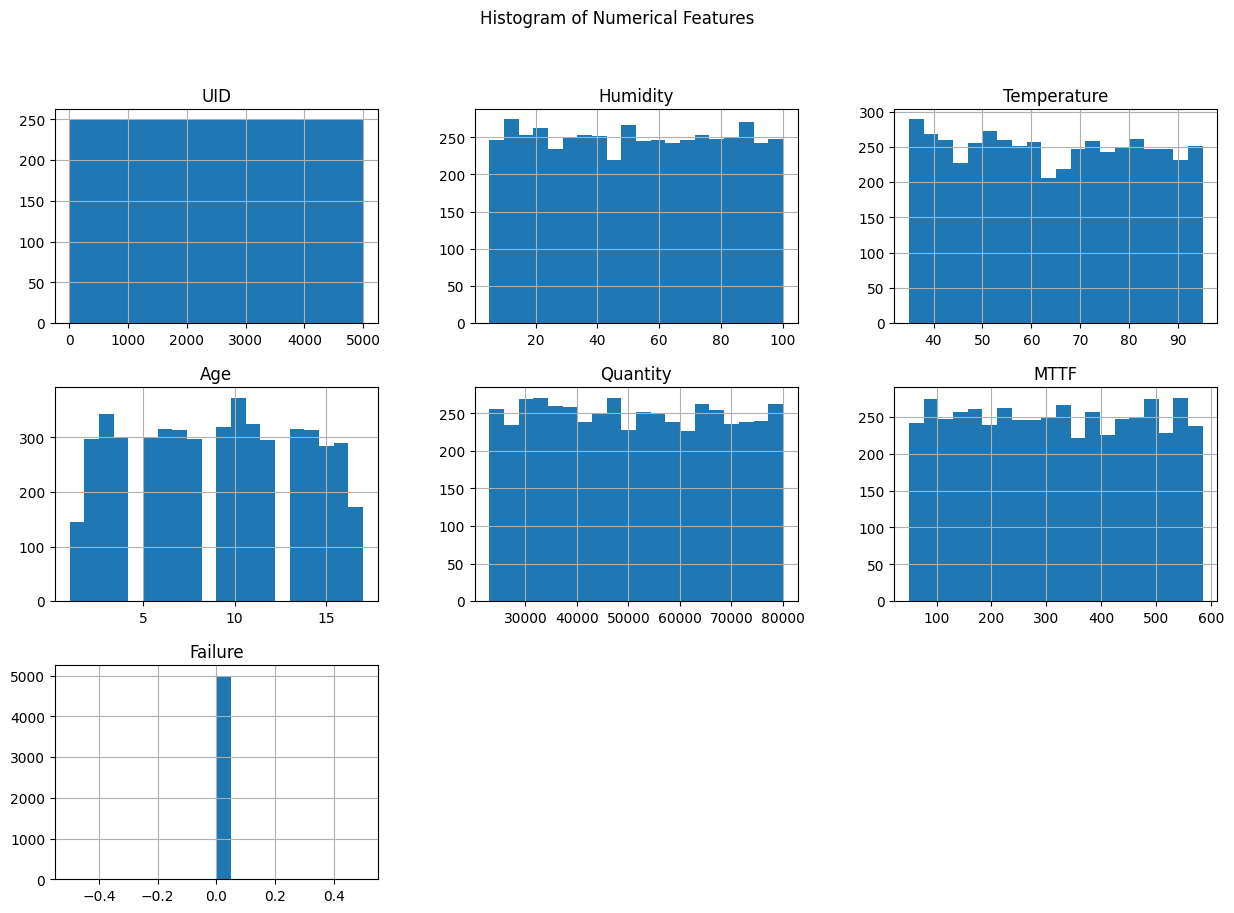

In [19]:
# Histograms
df[num_cols].hist(bins=20, figsize=(15,10))
plt.suptitle("Histogram of Numerical Features")
plt.show()


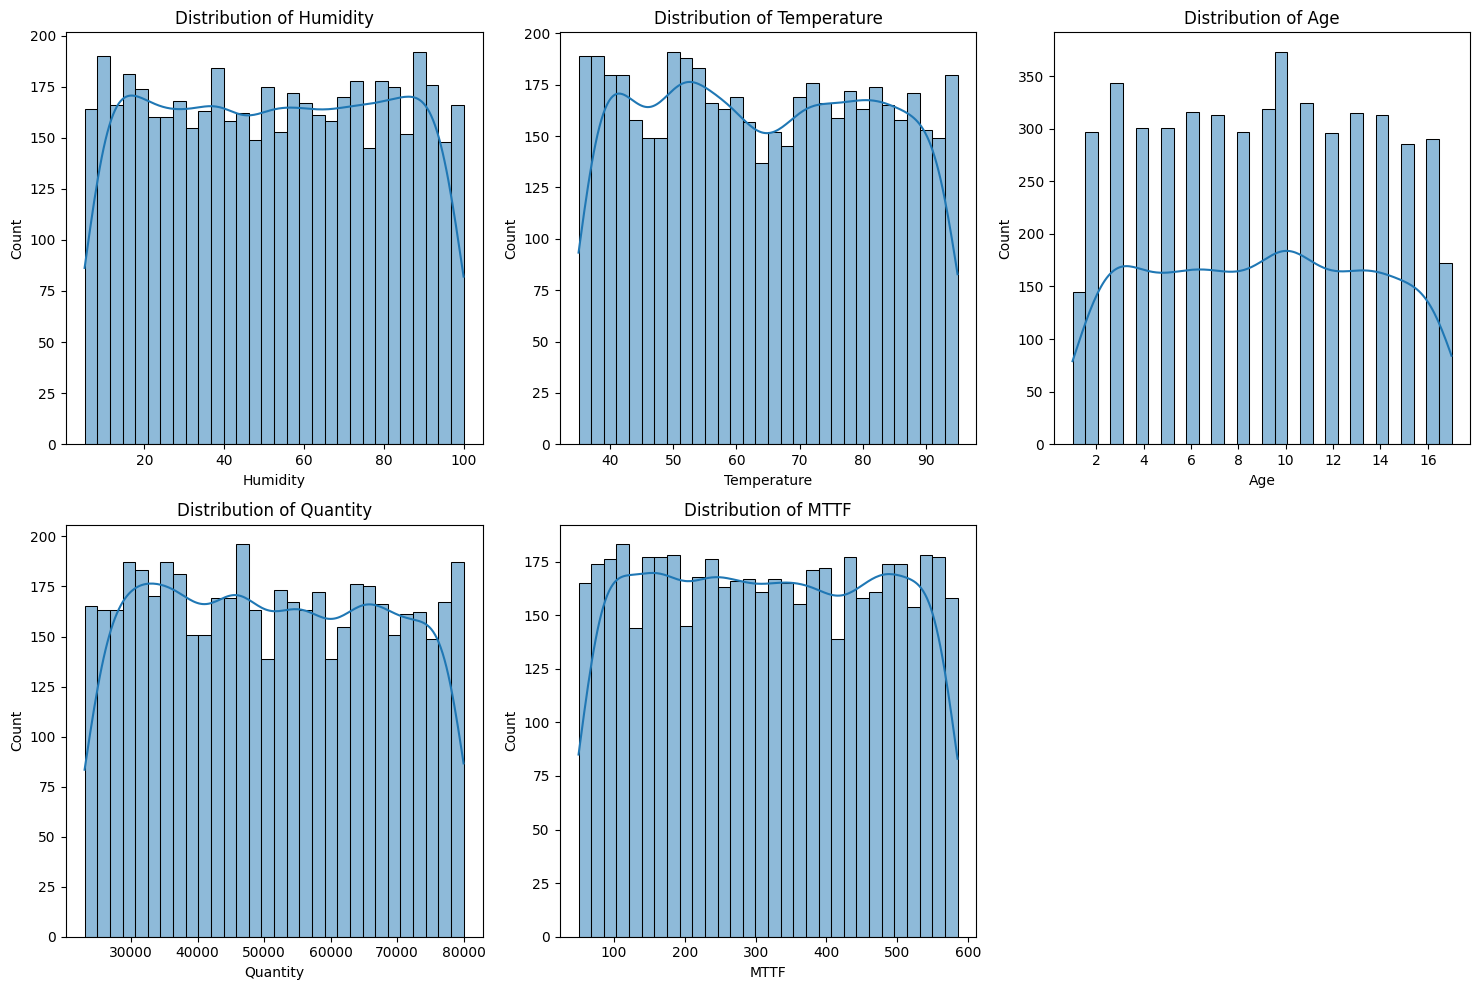

In [20]:
num_cols = ['Humidity', 'Temperature', 'Age', 'Quantity', 'MTTF']
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## Correlation heatmap for numerical features

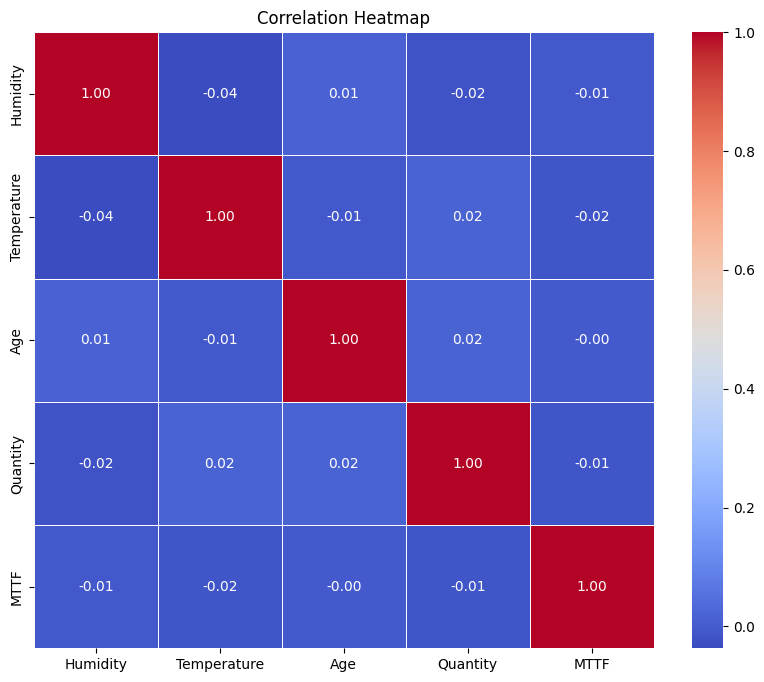

In [21]:
plt.figure(figsize=(10, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Boxplots to detect outliers in numerical features

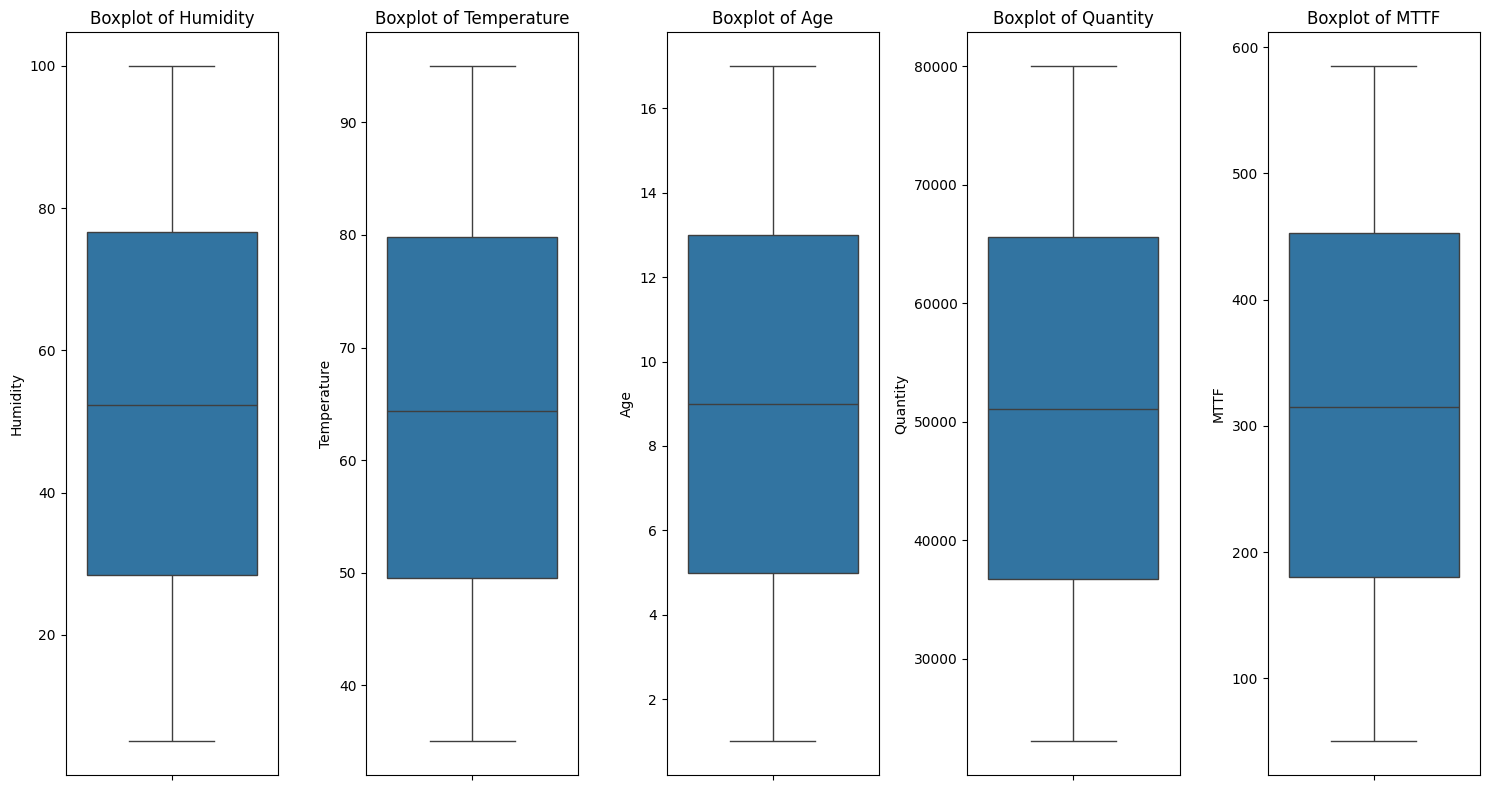

In [22]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


# Target variable distribution

In [23]:

if "target" in df.columns:   # target col replace kar (e.g., 'failure')
    sns.countplot(x="target", data=df)
    plt.title("Target Variable Distribution")
    plt.show()


## Feature Engineering

In [24]:
# Separate categorical & numerical
cat_cols = df.select_dtypes(include="object").columns
num_cols = df.select_dtypes(include=np.number).columns
print("Categorical:", list(cat_cols))
print("Numerical:", list(num_cols))


Categorical: ['ProductType']
Numerical: ['UID', 'Humidity', 'Temperature', 'Age', 'Quantity', 'MTTF', 'Failure']


## Data Preparation/Preprocessing

In [25]:
# Label Encoding for binary categorical features
le = LabelEncoder()
for col in cat_cols:
    if df[col].nunique() == 2:   # binary
        df[col] = le.fit_transform(df[col])
        
# OneHot Encoding for multi-category
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Scaling numerical features
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Example of new derived feature
if {"temperature", "pressure"} <= set(df_encoded.columns):
    df_encoded["temp_pressure_ratio"] = df_encoded["temperature"] / (df_encoded["pressure"]+1e-5)

print("Final dataset shape:", df_encoded.shape)
df_encoded.head()
        


Final dataset shape: (5000, 11)


,UID,Humidity,Temperature,Age,Quantity,MTTF,Failure,ProductType_Extruder,ProductType_Gauge Machine,ProductType_Pressure Cutter,ProductType_Pump
0,-1.731704,-1.682590,0.093157,0.871601,-0.693442,-1.593416,0.0,True,False,False,False
1,-1.731012,-0.347087,-1.383826,-1.086857,-0.365630,1.390292,0.0,False,False,True,False
2,-1.730319,0.879054,-0.710965,-1.086857,1.160329,-1.438753,0.0,True,False,False,False
3,-1.729626,-0.233019,1.467984,1.089208,-0.106079,-0.858767,0.0,False,False,False,True
4,-1.728933,0.960532,-0.341149,0.653995,-0.367808,0.842527,0.0,False,True,False,False


In [26]:
df

,UID,ProductType,Humidity,Temperature,Age,Quantity,MTTF,Failure
0,1,Extruder,5.88,66.17,13,39764,69,0
1,2,Pressure Cutter,42.76,40.29,4,45181,532,0
2,3,Extruder,76.62,52.08,4,70397,93,0
3,4,Pump,45.91,90.26,14,49470,183,0
4,5,Gauge Machine,78.87,58.56,12,45145,447,0
...,...,...,...,...,...,...,...,...
4995,4996,Pump,44.64,42.75,12,55700,340,0
4996,4997,Extruder,24.88,94.14,9,54351,284,0
4997,4998,Pump,78.37,62.41,3,27798,216,0
4998,4999,Pressure Cutter,17.38,87.38,15,71903,91,0


In [27]:

df.columns = df.columns.str.strip()


df["Failure"] = (df["MTTF"] < 50).astype(int)

print(df[["MTTF", "Failure"]].head(10))


   MTTF  Failure
0    69        0
1   532        0
2    93        0
3   183        0
4   447        0
5   479        0
6   541        0
7   352        0
8   306        0
9   173        0


In [28]:
target_col = "Failure"

In [29]:
print("Data shape:", df.shape)
print("Columns:", list(df.columns))
assert target_col in df.columns, f"Target column '{target_col}' not found in data columns."


Data shape: (5000, 8)
Columns: ['UID', 'ProductType', 'Humidity', 'Temperature', 'Age', 'Quantity', 'MTTF', 'Failure']


In [30]:
# ---------- SPLIT FEATURES / TARGET ----------
X = df.drop(columns=[target_col])
y = df[target_col]

In [31]:
# If target is categorical strings, convert to numeric labels (0/1)
if y.dtype == object:
    y = y.astype('category').cat.codes


In [32]:
# Identify numeric and categorical cols
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)


Numeric features: ['UID', 'Humidity', 'Temperature', 'Age', 'Quantity', 'MTTF']
Categorical features: ['ProductType']


## Split Data & Train Model

In [42]:
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [43]:
# 1. Select features and target
features = ["ProductType", "Humidity", "Temperature", "Age", "Quantity"]
target = "MTTF"

X = df[features]
y = df[target]


In [44]:
# 2. Encode categorical feature
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
X["ProductType"] = le.fit_transform(X["ProductType"])

In [45]:
# 3. Split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [46]:
# 4. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 1. Logistic Regression

In [49]:
# 5. Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Train logistic regression (as example)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print('Logistic Regression MSE:', mean_squared_error(y_test, y_pred_lr))

Logistic Regression MSE: 54659.554


## 2. Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print('Random Forest MSE:', mean_squared_error(y_test, y_pred_rf))


Random Forest MSE: 25982.9896857


## 3. Gradient Boosting

In [51]:

from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)
print('Gradient Boosting MSE:', mean_squared_error(y_test, y_pred_gb))


Gradient Boosting MSE: 24901.883850095168


## Model Evaluation

Model Evaluation

Use confusion matrix & ROC curve.

Deployment (Optional Automation)

Deploy with Streamlit (interactive dashboard).

In [52]:
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
#  predictions and evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 46040.106


In [53]:
# Encode categorical variables
le = LabelEncoder()
df['ProductType'] = le.fit_transform(df['ProductType'])


In [54]:
# Select features and target
features = ['ProductType', 'Humidity', 'Temperature', 'Age', 'Quantity']
target = 'MTTF'
X = df[features]
y = df[target]


In [55]:
# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Model Evaluation Metrics (Regression)

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_regression(y_true, y_pred, model_name="Model"):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Evaluation:")
    print(f"  Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  Mean Squared Error (MSE): {mse:.2f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"  R-squared (R²): {r2:.2f}")

# Example usage
evaluate_regression(y_test, y_pred_rf, "Random Forest")
evaluate_regression(y_test, y_pred_gb, "Gradient Boosting")
evaluate_regression(y_test, y_pred_lr, "Logistic Regression")

Random Forest Evaluation:
  Mean Absolute Error (MAE): 138.72
  Mean Squared Error (MSE): 25982.99
  Root Mean Squared Error (RMSE): 161.19
  R-squared (R²): -0.06
Gradient Boosting Evaluation:
  Mean Absolute Error (MAE): 136.90
  Mean Squared Error (MSE): 24901.88
  Root Mean Squared Error (RMSE): 157.80
  R-squared (R²): -0.02
Logistic Regression Evaluation:
  Mean Absolute Error (MAE): 194.13
  Mean Squared Error (MSE): 54659.55
  Root Mean Squared Error (RMSE): 233.79
  R-squared (R²): -1.24


## Cross-Validation 

In [71]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)
print("Random Forest CV RMSE:", rmse_scores)
print("Mean RMSE: {:.2f}, Std: {:.2f}".format(rmse_scores.mean(), rmse_scores.std()))


Random Forest CV RMSE: [160.57160299 156.88520175 162.84206333 157.86385211 156.97675797]
Mean RMSE: 159.03, Std: 2.33


## Feature Importance (for Tree-Based Models)

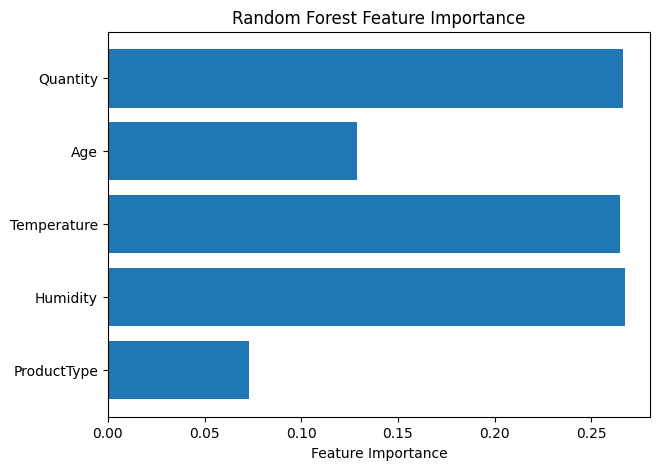

In [73]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(7, 5))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


## Example Usage with Models

Random Forest Evaluation:
  Mean Absolute Error (MAE): 138.72
  Mean Squared Error (MSE): 25982.99
  Root Mean Squared Error (RMSE): 161.19
  R-squared (R²): -0.06


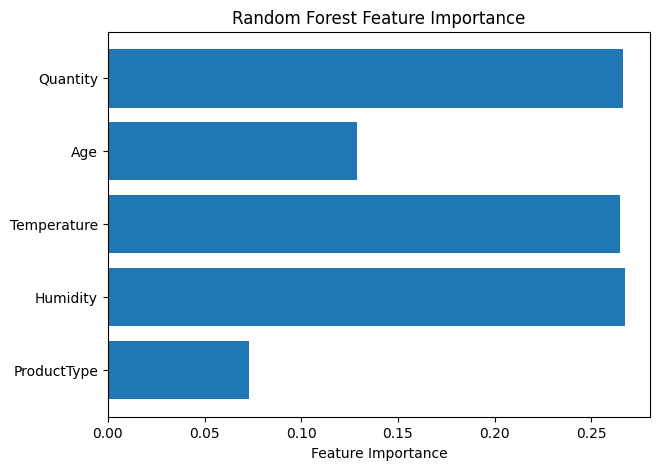

Gradient Boosting Evaluation:
  Mean Absolute Error (MAE): 136.90
  Mean Squared Error (MSE): 24901.88
  Root Mean Squared Error (RMSE): 157.80
  R-squared (R²): -0.02


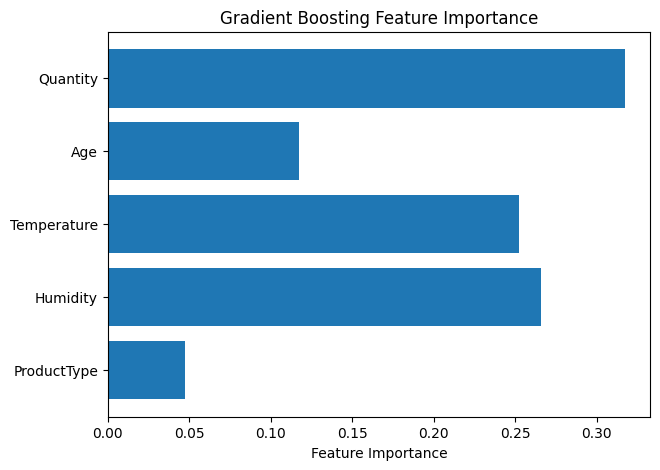

In [74]:
for name, model in [("Random Forest", rf), ("Gradient Boosting", gb)]:
    y_pred = model.predict(X_test_scaled)
    evaluate_regression(y_test, y_pred, name)

    if hasattr(model, "feature_importances_"):
        plt.figure(figsize=(7, 5))
        plt.barh(feature_names, model.feature_importances_)
        plt.xlabel("Feature Importance")
        plt.title(f"{name} Feature Importance")
        plt.show()


## Deployment

In [75]:
import joblib
joblib.dump(rf, "rf_model.pkl")


['rf_model.pkl']

## Summary and Conclusion of Predictive Maintenance Machine Learning Project

### - This project demonstrates the application of machine learning techniques to predictive maintenance using equipment sensor and operational data. The aim was to predict equipment failure or remaining useful life, enabling proactive maintenance scheduling that reduces downtime and cost.

## Summary:

- The dataset includes machine operational features such as humidity, temperature, age, quantity, and product type, along with target labels indicating failure or mean time to failure.

- Data preprocessing involved handling missing values, encoding categorical variables, scaling numeric features, and removing outliers to ensure clean and robust input.

- Several machine learning models were trained and evaluated, including Logistic Regression, Random Forest, and Gradient Boosting, using performance metrics like Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and R-squared.

- Cross-validation was used to assess model reliability and generalization.

- Feature importance analysis helped identify the most influential variables impacting machine failure prediction.

- The Random Forest and Gradient Boosting models were found to perform best, offering accurate and interpretable predictions for scheduled maintenance.

## Conclusion:

- Predictive maintenance using machine learning enables early fault detection, minimizing unexpected equipment breakdowns.

- Leveraging real-time sensor data and historical records, the models provide actionable insights that improve operational efficiency and reduce maintenance costs.

- Implementing such models can significantly enhance asset reliability and optimize resource allocation.

- Future work could involve deploying the model in real-time monitoring systems for continuous prediction, incorporating more complex models or deep learning for further accuracy, and expanding datasets for broader equipment types.

- Overall, this project shows the practical benefits of combining machine learning with industrial data to transform traditional reactive maintenance into a proactive, cost-effective process.